In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df = pd.read_csv('customer_data_5pNwh8HRSV.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


1.	Perform following pre-processing on the dataset:

•	Drop the columns ‘ID’ and ‘Var_1’.

•	Check if there are any null values and remove all records having null values.

•	Drop all rows having Family_Size values as 7.0, 8.0 and 9.0.

• Formulate a Deep Learning problem by taking ‘Segmentation’ as the target and other

• columns as  features. Is it classification or regression? Justify.

•	Convert all categorical features into numeric and normalise them.

•	Transform the target values to respective labels.

•	Split the feature set and target into train and test with 80:20 ratio. Use random_state=10 (throughout the experiment).


In [ ]:
df = df.drop(['ID','Var_1'],axis = 1)
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


In [ ]:
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

In [ ]:
df = df.dropna(how = 'any')
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [ ]:
df.shape

(6718, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6718 non-null   object 
 1   Ever_Married     6718 non-null   object 
 2   Age              6718 non-null   int64  
 3   Graduated        6718 non-null   object 
 4   Profession       6718 non-null   object 
 5   Work_Experience  6718 non-null   float64
 6   Spending_Score   6718 non-null   object 
 7   Family_Size      6718 non-null   float64
 8   Segmentation     6718 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 524.8+ KB


In [ ]:
df['Family_Size'].value_counts()

2.0    2109
3.0    1302
1.0    1251
4.0    1184
5.0     531
6.0     180
7.0      81
8.0      42
9.0      38
Name: Family_Size, dtype: int64

In [ ]:
df = df[df['Family_Size'] < 7.0]
df.shape

(6557, 9)

In [ ]:
df['Family_Size'].value_counts()

2.0    2109
3.0    1302
1.0    1251
4.0    1184
5.0     531
6.0     180
Name: Family_Size, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6557 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6557 non-null   object 
 1   Ever_Married     6557 non-null   object 
 2   Age              6557 non-null   int64  
 3   Graduated        6557 non-null   object 
 4   Profession       6557 non-null   object 
 5   Work_Experience  6557 non-null   float64
 6   Spending_Score   6557 non-null   object 
 7   Family_Size      6557 non-null   float64
 8   Segmentation     6557 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 512.3+ KB


In [ ]:
df['Segmentation'].value_counts()

D    1704
C    1701
A    1590
B    1562
Name: Segmentation, dtype: int64

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['A','B','C','D'])
df['Segmentation'] = le.transform(df['Segmentation'])
df['Segmentation'].value_counts()

3    1704
2    1701
0    1590
1    1562
Name: Segmentation, dtype: int64

## Since the target variable 'Segmentation' is categorical and has more than 2 classes, we can conclude that the problem is of multi-class classification

In [ ]:
X = df.drop('Segmentation',axis = 1)
y = df['Segmentation']

X.shape,y.shape

((6557, 8), (6557,))

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6557 entries, 0 to 8067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6557 non-null   object 
 1   Ever_Married     6557 non-null   object 
 2   Age              6557 non-null   int64  
 3   Graduated        6557 non-null   object 
 4   Profession       6557 non-null   object 
 5   Work_Experience  6557 non-null   float64
 6   Spending_Score   6557 non-null   object 
 7   Family_Size      6557 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 461.0+ KB


In [ ]:
X = pd.get_dummies(X)
X.shape

(6557, 21)

In [ ]:
X

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,67,1.0,1.0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,67,0.0,2.0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
5,56,0.0,2.0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
6,32,1.0,3.0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,41,0.0,5.0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
8064,35,3.0,4.0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8065,33,1.0,1.0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
8066,27,1.0,4.0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_scaled=sc.fit_transform(X)
X_scaled

array([[-1.31657656, -0.47807376,  0.96388   , ..., -0.58128326,
        -0.42069939,  0.82148668],
       [ 1.40855488, -0.47807376, -1.29816766, ..., -0.58128326,
        -0.42069939,  0.82148668],
       [ 1.40855488, -0.77183533, -0.54415177, ..., -0.58128326,
         2.3769942 , -1.2173052 ],
       ...,
       [-0.65043332, -0.47807376, -1.29816766, ..., -0.58128326,
        -0.42069939,  0.82148668],
       [-1.01378417, -0.47807376,  0.96388   , ..., -0.58128326,
        -0.42069939,  0.82148668],
       [-0.40819941, -0.77183533,  0.20986411, ...,  1.72033167,
        -0.42069939, -1.2173052 ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y, test_size=0.2, random_state=10)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5245, 21), (1312, 21), (5245,), (1312,))

2.	Build a Multi-Layer Perceptron Neural Network model with only one hidden layer with validation data size to be 20%. Explain the reason of choosing the number of units in each layer, selection of activation function and loss function. Train and evaluate the model. Comment on the performance of the model.

### Building the model

Epoch 1/10
132/132 [==============================] - 2s 4ms/step - loss: 1.4433 - accuracy: 0.3360 - val_loss: 1.3374 - val_accuracy: 0.3985
Epoch 2/10
132/132 [==============================] - 0s 3ms/step - loss: 1.2438 - accuracy: 0.4418 - val_loss: 1.2222 - val_accuracy: 0.4566
Epoch 3/10
132/132 [==============================] - 0s 2ms/step - loss: 1.1691 - accuracy: 0.4805 - val_loss: 1.1758 - val_accuracy: 0.4652
Epoch 4/10
132/132 [==============================] - 0s 2ms/step - loss: 1.1378 - accuracy: 0.5007 - val_loss: 1.1547 - val_accuracy: 0.4814
Epoch 5/10
132/132 [==============================] - 0s 2ms/step - loss: 1.1207 - accuracy: 0.5110 - val_loss: 1.1418 - val_accuracy: 0.4909
Epoch 6/10
132/132 [==============================] - 0s 2ms/step - loss: 1.1089 - accuracy: 0.5176 - val_loss: 1.1325 - val_accuracy: 0.4938
Epoch 7/10
132/132 [==============================] - 0s 4ms/step - loss: 1.1002 - accuracy: 0.5241 - val_loss: 1.1251 - val_accuracy: 0.4976
Epoch 

[1.0856956243515015, 0.5182926654815674]

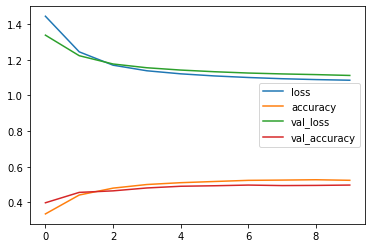

In [ ]:
model_1=tf.keras.Sequential()
#Hidden layer, therefore number of neuron can be anything, activation = relu since it is most widely used when not specified otherwise
model_1.add(tf.keras.layers.Dense(10,activation='relu'))
#Output layer; therefore number of neuron = number of classes, ie 4, since it is multicalss classification, therefore activation = softmax
model_1.add(tf.keras.layers.Dense(4,activation='softmax'))

# Compiling the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
#Loss fucntion = SparseCategoricalCrossentropy() since it is multiclass classification
#Metric = 'accuracy' since it is a classification problem
#optimizer = Adam() since that is the most widely used

# Training
tf.random.set_seed(10)
## Validation split
hist_1=model_1.fit(X_train,y_train,epochs=10, validation_split=0.2)
pd.DataFrame(hist_1.history).plot();

print(' Evaluation Result:\n')
model_1.evaluate(X_test,y_test)

In [ ]:
print('Test Evaluation Result:\n')
model_1.evaluate(X_test,y_test)

Test Evaluation Result:

41/41 [==============================] - 0s 3ms/step - loss: 1.0857 - accuracy: 0.5183


[1.0856956243515015, 0.5182926654815674]

#Remark 1

Train loss = 1.0849;
Test loss = 1.0857

The model does not seem to suffer from overfitting or underfitting

3.	Improve the model by incorporating callbacks with patience value of 3. Comment on the result. Create another model by performing Dropout with a rate of 0.1. Does it help for getting better results? Briefly explain.

Epoch 1/10
132/132 [==============================] - 4s 19ms/step - loss: 1.4205 - accuracy: 0.3489 - val_loss: 1.2585 - val_accuracy: 0.4194
Epoch 2/10
132/132 [==============================] - 1s 4ms/step - loss: 1.2089 - accuracy: 0.4440 - val_loss: 1.1736 - val_accuracy: 0.4824
Epoch 3/10
132/132 [==============================] - 0s 3ms/step - loss: 1.1526 - accuracy: 0.4878 - val_loss: 1.1475 - val_accuracy: 0.4890
Epoch 4/10
132/132 [==============================] - 0s 3ms/step - loss: 1.1301 - accuracy: 0.4945 - val_loss: 1.1342 - val_accuracy: 0.5024
Epoch 5/10
132/132 [==============================] - 0s 3ms/step - loss: 1.1165 - accuracy: 0.5074 - val_loss: 1.1260 - val_accuracy: 0.5100
Epoch 6/10
132/132 [==============================] - 0s 2ms/step - loss: 1.1073 - accuracy: 0.5131 - val_loss: 1.1215 - val_accuracy: 0.5129
Epoch 7/10
132/132 [==============================] - 0s 3ms/step - loss: 1.1009 - accuracy: 0.5186 - val_loss: 1.1170 - val_accuracy: 0.5148
Epoch

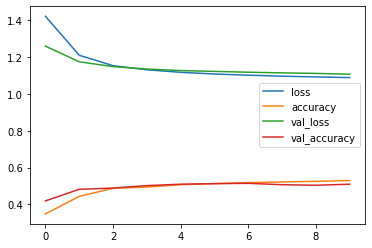

In [ ]:
model_2=tf.keras.Sequential()
#Hidden layer, therefore number of neuron can be anything, activation = relu since it is most widely used when not specified otherwise
model_2.add(tf.keras.layers.Dense(10,activation='relu'))
#Output layer; therefore number of neuron = number of classes, ie 4, since it is multicalss classification, therefore activation = softmax
model_2.add(tf.keras.layers.Dense(4,activation='softmax'))

# Compiling the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
#Loss fucntion = SparseCategoricalCrossentropy() since it is multiclass classification
#Metric = 'accuracy' since it is a classification problem
#optimizer = Adam() since that is the most widely used

#Adding earlystop on 'val_loss'
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

# Training
tf.random.set_seed(10)
## Validation split
hist_2=model_2.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_2.history).plot();

In [ ]:
print('Test Evaluation Result:\n')
model_2.evaluate(X_test,y_test)

Test Evaluation Result:

41/41 [==============================] - 0s 4ms/step - loss: 1.0932 - accuracy: 0.5213


[1.0931581258773804, 0.5213414430618286]

#Remark 2

Early stop was not executed

model 2 train loss = 1.0881; test loss = 1.0932

No overfitting observed

Slight improvement in Accuracy so retaining Model 2

Epoch 1/10
132/132 [==============================] - 2s 4ms/step - loss: 1.5832 - accuracy: 0.2948 - val_loss: 1.3361 - val_accuracy: 0.4061
Epoch 2/10
132/132 [==============================] - 0s 3ms/step - loss: 1.3162 - accuracy: 0.4035 - val_loss: 1.2182 - val_accuracy: 0.4557
Epoch 3/10
132/132 [==============================] - 0s 2ms/step - loss: 1.2327 - accuracy: 0.4409 - val_loss: 1.1711 - val_accuracy: 0.4766
Epoch 4/10
132/132 [==============================] - 0s 3ms/step - loss: 1.1956 - accuracy: 0.4514 - val_loss: 1.1503 - val_accuracy: 0.5043
Epoch 5/10
132/132 [==============================] - 0s 3ms/step - loss: 1.1642 - accuracy: 0.4638 - val_loss: 1.1375 - val_accuracy: 0.5043
Epoch 6/10
132/132 [==============================] - 0s 2ms/step - loss: 1.1450 - accuracy: 0.4752 - val_loss: 1.1261 - val_accuracy: 0.5138
Epoch 7/10
132/132 [==============================] - 0s 3ms/step - loss: 1.1345 - accuracy: 0.4907 - val_loss: 1.1198 - val_accuracy: 0.5091
Epoch 

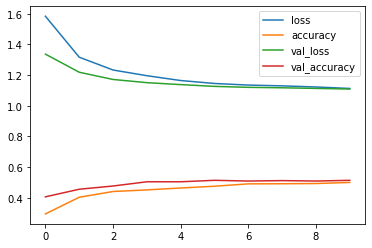

In [ ]:
model_3=tf.keras.Sequential()
#Hidden layer, therefore number of neuron can be anything, activation = relu since it is most widely used when not specified otherwise
model_3.add(tf.keras.layers.Dense(10,activation='relu'))

# Dropout layer
model_3.add(tf.keras.layers.Dropout(0.1)) # 10% of units will be dropped

#Output layer; therefore number of neuron = number of classes, ie 4, since it is multicalss classification, therefore activation = softmax
model_3.add(tf.keras.layers.Dense(4,activation='softmax'))

# Compiling the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
#Loss fucntion = SparseCategoricalCrossentropy() since it is multiclass classification
#Metric = 'accuracy' since it is a classification problem
#optimizer = Adam() since that is the most widely used

#Adding earlystop on 'val_loss'
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

# Training
tf.random.set_seed(10)
## Validation split
hist_3=model_3.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_3.history).plot();

In [ ]:
print('Test Evaluation Result:\n')
model_3.evaluate(X_test,y_test)

Test Evaluation Result:

41/41 [==============================] - 0s 3ms/step - loss: 1.0883 - accuracy: 0.5183


[1.088263988494873, 0.5182926654815674]

#Remark 3

Early stop was not executed

model 3 train loss = 1.1125; test loss = 1.0883

No overfitting observed, performace has dropped as Model 2 accuracy was 0.5298 and Model 3 accuracy is 0.5

###Therefore retaining model 2

4.	Revise the model by first changing the no of layers and then number of units. Comment on the result each time.

Epoch 1/10
132/132 [==============================] - 2s 5ms/step - loss: 1.3741 - accuracy: 0.3632 - val_loss: 1.2937 - val_accuracy: 0.3985
Epoch 2/10
132/132 [==============================] - 1s 4ms/step - loss: 1.2288 - accuracy: 0.4304 - val_loss: 1.2154 - val_accuracy: 0.4519
Epoch 3/10
132/132 [==============================] - 0s 4ms/step - loss: 1.1666 - accuracy: 0.4738 - val_loss: 1.1700 - val_accuracy: 0.4805
Epoch 4/10
132/132 [==============================] - 0s 4ms/step - loss: 1.1353 - accuracy: 0.4995 - val_loss: 1.1492 - val_accuracy: 0.4843
Epoch 5/10
132/132 [==============================] - 1s 5ms/step - loss: 1.1185 - accuracy: 0.5088 - val_loss: 1.1385 - val_accuracy: 0.4900
Epoch 6/10
132/132 [==============================] - 0s 4ms/step - loss: 1.1086 - accuracy: 0.5107 - val_loss: 1.1324 - val_accuracy: 0.5043
Epoch 7/10
132/132 [==============================] - 0s 2ms/step - loss: 1.1018 - accuracy: 0.5174 - val_loss: 1.1272 - val_accuracy: 0.5005
Epoch 

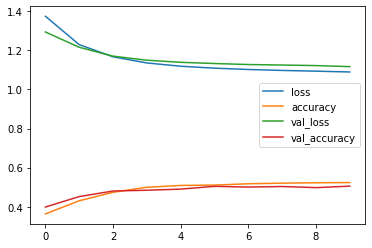

In [ ]:
model_4=tf.keras.Sequential()
#Hidden layer, therefore number of neuron can be anything, activation = relu since it is most widely used when not specified otherwise
model_4.add(tf.keras.layers.Dense(10,activation='relu'))

#Adding another hidden layer
model_4.add(tf.keras.layers.Dense(10,activation='relu'))

#Output layer; therefore number of neuron = number of classes, ie 4, since it is multicalss classification, therefore activation = softmax
model_4.add(tf.keras.layers.Dense(4,activation='softmax'))

# Compiling the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
#Loss fucntion = SparseCategoricalCrossentropy() since it is multiclass classification
#Metric = 'accuracy' since it is a classification problem
#optimizer = Adam() since that is the most widely used

#Adding earlystop on 'val_loss'
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

# Training
tf.random.set_seed(10)
## Validation split
hist_4=model_4.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_4.history).plot();

In [ ]:
print('Test Evaluation Result:\n')
model_4.evaluate(X_test,y_test)

Test Evaluation Result:

41/41 [==============================] - 0s 7ms/step - loss: 1.0880 - accuracy: 0.5152


[1.0879738330841064, 0.5152438879013062]

#Remark 4

Early stop was not executed

model 4 train loss = 1.0891; test loss = 1.0880

No overfitting observed

Since adding a new hidden layer did not improve performance (Accuracy), therefore retaining Model 2

Epoch 1/10
132/132 [==============================] - 3s 5ms/step - loss: 1.4720 - accuracy: 0.3482 - val_loss: 1.2712 - val_accuracy: 0.4471
Epoch 2/10
132/132 [==============================] - 0s 2ms/step - loss: 1.2179 - accuracy: 0.4621 - val_loss: 1.1797 - val_accuracy: 0.4929
Epoch 3/10
132/132 [==============================] - 0s 3ms/step - loss: 1.1543 - accuracy: 0.4857 - val_loss: 1.1497 - val_accuracy: 0.5071
Epoch 4/10
132/132 [==============================] - 0s 2ms/step - loss: 1.1273 - accuracy: 0.4959 - val_loss: 1.1355 - val_accuracy: 0.5167
Epoch 5/10
132/132 [==============================] - 0s 2ms/step - loss: 1.1106 - accuracy: 0.5055 - val_loss: 1.1271 - val_accuracy: 0.5129
Epoch 6/10
132/132 [==============================] - 0s 2ms/step - loss: 1.1001 - accuracy: 0.5133 - val_loss: 1.1196 - val_accuracy: 0.5167
Epoch 7/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0927 - accuracy: 0.5176 - val_loss: 1.1160 - val_accuracy: 0.5129
Epoch 

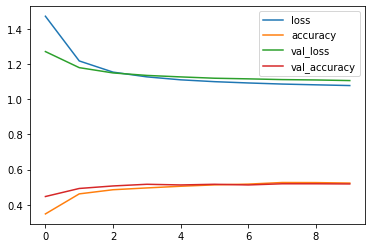

In [ ]:
model_5=tf.keras.Sequential()
#Hidden layer, therefore number of neuron can be anything, activation = relu since it is most widely used when not specified otherwise
model_5.add(tf.keras.layers.Dense(15,activation='relu'))

#Output layer; therefore number of neuron = number of classes, ie 4, since it is multicalss classification, therefore activation = softmax
model_5.add(tf.keras.layers.Dense(4,activation='softmax'))

# Compiling the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
#Loss fucntion = SparseCategoricalCrossentropy() since it is multiclass classification
#Metric = 'accuracy' since it is a classification problem
#optimizer = Adam() since that is the most widely used

#Adding earlystop on 'val_loss'
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

# Training
tf.random.set_seed(10)
## Validation split
hist_5=model_5.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_5.history).plot();

In [ ]:
print('Test Evaluation Result:\n')
model_5.evaluate(X_test,y_test)

Test Evaluation Result:

41/41 [==============================] - 0s 5ms/step - loss: 1.0786 - accuracy: 0.5244


[1.0786213874816895, 0.5243902206420898]

#Remark 5

Early stop was not executed

model 5 train loss = 1.0780; test loss = 1.0786

No overfitting observed

Since changing the number of neurons has reduced the loss slightly, therefore retaining Model 5

5.	Create a graph showing test losses corresponding to each model and suggest the best model. Does the best model show overfitting? If we increase the no of epochs by hundred times, will you get a better model? Justify the answer.  What is your final observation about the effectiveness of neural network for the problem?

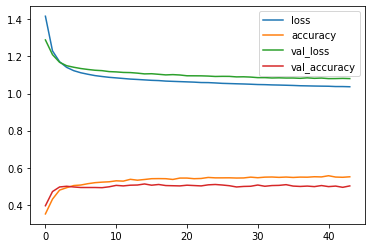

In [ ]:
#Building a model with 100 times the number of epochs as before

model_6=tf.keras.Sequential()
#Hidden layer, therefore number of neuron can be anything, activation = relu since it is most widely used when not specified otherwise
model_6.add(tf.keras.layers.Dense(15,activation='relu'))

#Output layer; therefore number of neuron = number of classes, ie 4, since it is multicalss classification, therefore activation = softmax
model_6.add(tf.keras.layers.Dense(4,activation='softmax'))

# Compiling the model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
#Loss fucntion = SparseCategoricalCrossentropy() since it is multiclass classification
#Metric = 'accuracy' since it is a classification problem
#optimizer = Adam() since that is the most widely used

#Adding earlystop on 'val_loss'
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

# Training
tf.random.set_seed(10)
## Validation split
hist_6=model_6.fit(X_train,y_train,epochs=1000, validation_split=0.2,callbacks=[early_stop],verbose=0)
pd.DataFrame(hist_6.history).plot();

In [ ]:
pd.DataFrame(hist_6.history).tail()

,loss,accuracy,val_loss,val_accuracy
39,1.039645,0.550763,1.083176,0.504290
40,1.039165,0.557197,1.080284,0.498570
41,1.037563,0.550048,1.080494,0.501430
42,1.037460,0.548856,1.081507,0.494757
43,1.036415,0.551478,1.080363,0.502383


In [ ]:
print('Test Evaluation Result:\n')
model_6.evaluate(X_test,y_test)

Test Evaluation Result:

41/41 [==============================] - 0s 2ms/step - loss: 1.0617 - accuracy: 0.5221


[1.0617212057113647, 0.5221036672592163]

#Remark 6

When running with 1000 epochs, Early stop was executed at around epoch number 43

model 6 train loss = 1.0364; test loss = 1.0617

No overfitting observed

Accuracy did not improve significantly

Therefore running with high number of epochs does not seem benificial

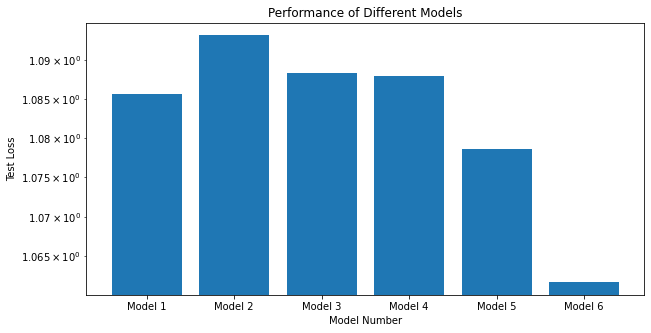

In [ ]:
model_number = ['Model 1','Model 2','Model 3','Model 4','Model 5','Model 6']
test_loss = [1.0857,1.0932,1.0883,1.0880,1.0786,1.0617]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(model_number, test_loss,log = True)

plt.xlabel("Model Number")
plt.ylabel("Test Loss")
plt.title("Performance of Different Models")
plt.show()

As seen in the above graph, Model 6 has the minimum test loss but has to run for high number of epochs

Model 5 with Cross Validation, Early Stopping, and one hidden layer with 15 units seems to give best results for only 10 number of epochs

Therefore model 6 is best if processing power and compute time is not an issue, else model 5 is best